In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd = os.getcwd()

In [3]:

df = pd.read_csv(pwd + '\\Airbnb_Data.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_40736\2947065569.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pwd + '\\Airbnb_Data.csv')


In [4]:
df.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [5]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [6]:
column_drop = ['host id','id','country','country code','license','lat','long']

In [7]:
df_clean = df.drop(columns= column_drop, errors = 'ignore')

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   NAME                            102349 non-null  object 
 1   host_identity_verified          102310 non-null  object 
 2   host name                       102193 non-null  object 
 3   neighbourhood group             102570 non-null  object 
 4   neighbourhood                   102583 non-null  object 
 5   instant_bookable                102494 non-null  object 
 6   cancellation_policy             102523 non-null  object 
 7   room type                       102599 non-null  object 
 8   Construction year               102385 non-null  float64
 9   price                           102352 non-null  object 
 10  service fee                     102326 non-null  object 
 11  minimum nights                  102190 non-null  float64
 12  number of review

In [9]:
## missing values
missing_value = df_clean.isnull().sum().sort_values(ascending=True)
print ("Missing Values Count: ")
print(missing_value)

Missing Values Count: 
room type                             0
neighbourhood                        16
neighbourhood group                  29
cancellation_policy                  76
instant_bookable                    105
number of reviews                   183
Construction year                   214
price                               247
NAME                                250
service fee                         273
host_identity_verified              289
calculated host listings count      319
review rate number                  326
host name                           406
minimum nights                      409
availability 365                    448
reviews per month                 15879
last review                       15893
house_rules                       52131
dtype: int64


In [10]:
##check for duplicates
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean[col].fillna('Unknown', inplace = True)
    else:
        df_clean[col].fillna(df_clean[col].median(), inplace =True)
df_clean
    

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,Unknown,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,Unknown,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,Unknown,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,Unknown
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,Unknown,0.74,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...
102595,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...
102596,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,Unknown,0.74,5.0,1.0,342.0,Unknown
102597,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,Unknown


In [11]:
## drop duplicates
before_dup = len(df_clean)
df_clean.drop_duplicates(inplace=True)
after_dup = len(df_clean)
print(f"Total number of records before removing duplicates: {before_dup}")
print(f"Total number of records after removing duplicates: {after_dup}")

Total number of records before removing duplicates: 102599
Total number of records after removing duplicates: 99155


In [12]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Index: 99155 entries, 0 to 102057
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            99155 non-null  object 
 1   host_identity_verified          99155 non-null  object 
 2   host name                       99155 non-null  object 
 3   neighbourhood group             99155 non-null  object 
 4   neighbourhood                   99155 non-null  object 
 5   instant_bookable                99155 non-null  object 
 6   cancellation_policy             99155 non-null  object 
 7   room type                       99155 non-null  object 
 8   Construction year               99155 non-null  float64
 9   price                           99155 non-null  object 
 10  service fee                     99155 non-null  object 
 11  minimum nights                  99155 non-null  float64
 12  number of reviews               9915

In [13]:
##rename columns and replace space with underscore
df_clean.rename(columns ={'availability 365': "days_booked"}, inplace=True)
df_clean.column = df_clean.columns.str.lower().str.replace(' ','_')


C:\Users\Admin\AppData\Local\Temp\ipykernel_40736\3862931041.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_clean.column = df_clean.columns.str.lower().str.replace(' ','_')


In [14]:
df_clean ['price'] = df_clean['price'].replace({'\$':'',',':''}, regex = True)
df_clean['service fee'] = df_clean['service fee'].replace({'\$':'',',':''}, regex = True)
df_clean['price'] = pd.to_numeric(df_clean['price'], errors = 'coerce')
df_clean ['service fee'] = pd.to_numeric(df_clean['service fee'], errors= 'coerce')

In [15]:
df_clean

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,days_booked,house_rules
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,THE VILLAGE OF HARLEM....NEW YORK !,Unknown,Elise,Manhattan,Harlem,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,Unknown,0.74,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,Unknown,unconfirmed,Garry,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,Unknown
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102053,Cozy bright room near Prospect Park,unconfirmed,Mariam,Brooklyn,Flatbush,True,moderate,Private room,2012.0,696.0,NaN,7.0,12.0,3/27/2019,0.44,5.0,1.0,0.0,Shoes off Clean After yourself Turn Lights and...
102054,Private Bedroom with Amazing Rooftop View,verified,Trey,Brooklyn,Bushwick,False,flexible,Private room,2012.0,909.0,NaN,1.0,19.0,8/31/2017,0.72,3.0,2.0,0.0,#NAME?
102055,Pretty Brooklyn One-Bedroom for 2 to 4 people,verified,Michael,Brooklyn,Bedford-Stuyvesant,True,moderate,Entire home/apt,2012.0,387.0,NaN,2.0,50.0,6/26/2019,3.12,4.0,2.0,235.0,* Check out: 10am * We made an effort to keep ...
102056,Room & private bathroom in historic Harlem,unconfirmed,Shireen,Manhattan,Harlem,True,strict,Private room,2012.0,848.0,NaN,2.0,0.0,Unknown,0.74,1.0,1.0,0.0,Each of us is working and/or going to school a...


In [16]:
#count of room types
room_count = df_clean['room type'].value_counts()
print('Room Count')
print(room_count)

Room Count
room type
Entire home/apt    51995
Private room       44895
Shared room         2150
Hotel room           115
Name: count, dtype: int64


In [35]:
## which room has more cancellation
strict_count  = df_clean.groupby('room type')['cancellation_policy'].value_counts().groupby(level=0).head(1)
print(strict_count)


room type        cancellation_policy
Entire home/apt  flexible               17362
Hotel room       flexible                  44
Private room     moderate               15101
Shared room      strict                   718
Name: count, dtype: int64


In [18]:
avg_price_neighborhood = df_clean.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False)
print("Average price per neighborhood group:")
print(avg_price_neighborhood)

Average price per neighborhood group:
neighbourhood group
Unknown          658.357143
Queens           629.712735
Bronx            626.614412
Brooklyn         626.448008
Staten Island    626.431843
Manhattan        622.708684
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64


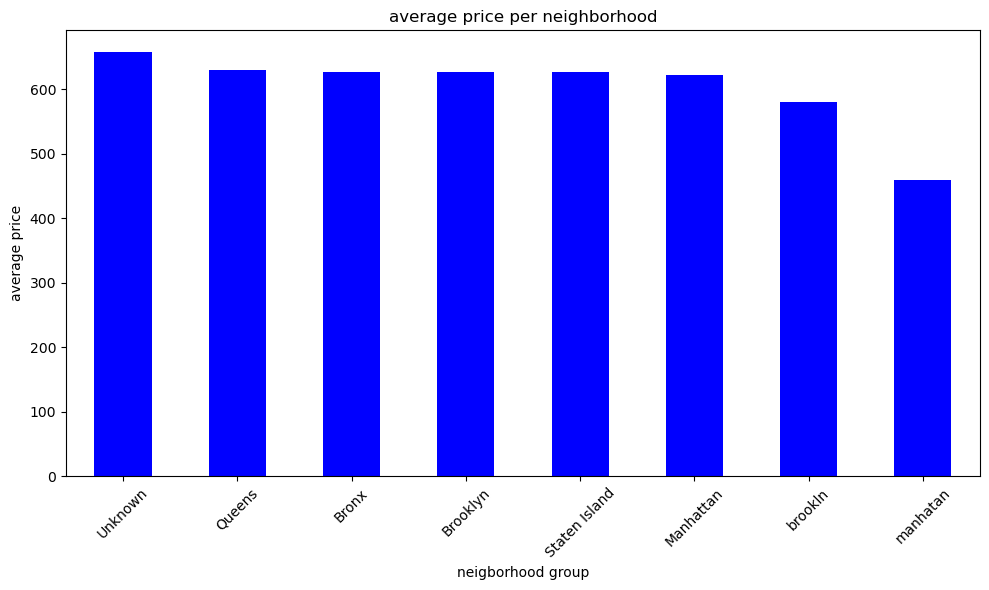

In [23]:
## plotting avg neighborhood price
plt.figure(figsize=(10,6))
avg_price_neighborhood.plot(kind='bar',color = 'blue')
plt.title('average price per neighborhood')
plt.xlabel('neigborhood group')
plt.ylabel('average price')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [27]:
strict_data = df_clean.groupby('room type')['cancellation_policy'].value_counts().unstack()
print (strict_data)

cancellation_policy  Unknown  flexible  moderate   strict
room type                                                
Entire home/apt         50.0   17362.0   17343.0  17240.0
Hotel room               NaN      44.0      37.0     34.0
Private room            23.0   14834.0   15101.0  14937.0
Shared room              3.0     714.0     715.0    718.0


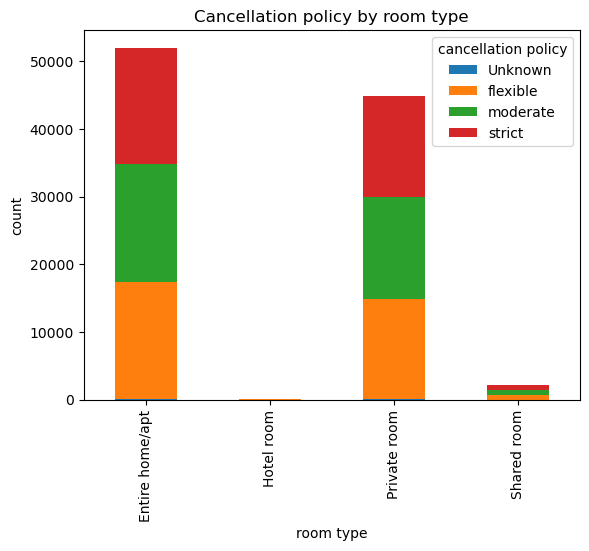

In [28]:
## strict room type graph

strict_data.plot(kind ='bar', stacked= True)
plt.title ('Cancellation policy by room type')
plt.xlabel ("room type")
plt.ylabel('count')
plt.legend(title = 'cancellation policy') 
plt.show()

In [37]:
df_clean.dtypes

NAME                               object
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
days_booked                       float64
house_rules                        object
dtype: object

In [45]:
review_count = df_clean.groupby('room type')['number of reviews'].count().sort_values()
print(review_count)

room type
Hotel room           115
Shared room         2150
Private room       44895
Entire home/apt    51995
Name: number of reviews, dtype: int64


In [51]:
review_rate_avg = df_clean.groupby('room type')['review rate number'].mean().round().sort_values()
print(review_rate_avg)

room type
Entire home/apt    3.0
Private room       3.0
Shared room        3.0
Hotel room         4.0
Name: review rate number, dtype: float64


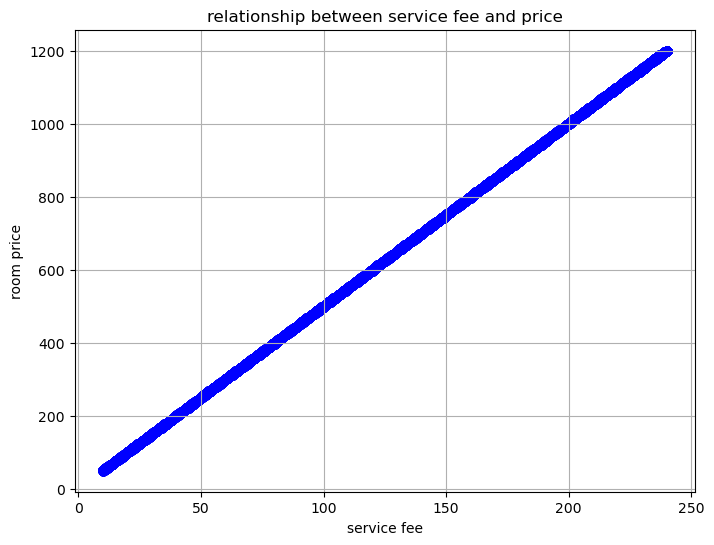

In [54]:
##Relation to service fee and price
plt.figure(figsize=(8,6))
plt.scatter(df_clean['service fee'],df_clean['price'], alpha=0.5, color ='blue')
plt.title('relationship between service fee and price')
plt.xlabel('service fee')
plt.ylabel('room price')
plt.grid(True)
plt.show()

neighbourhood group
brookln           47.000000
Brooklyn         130.752910
Manhattan        142.674133
Unknown          160.724138
Queens           162.407555
Bronx            178.991590
Staten Island    195.989130
manhatan         325.000000
Name: days_booked, dtype: float64


<Axes: ylabel='days_booked'>

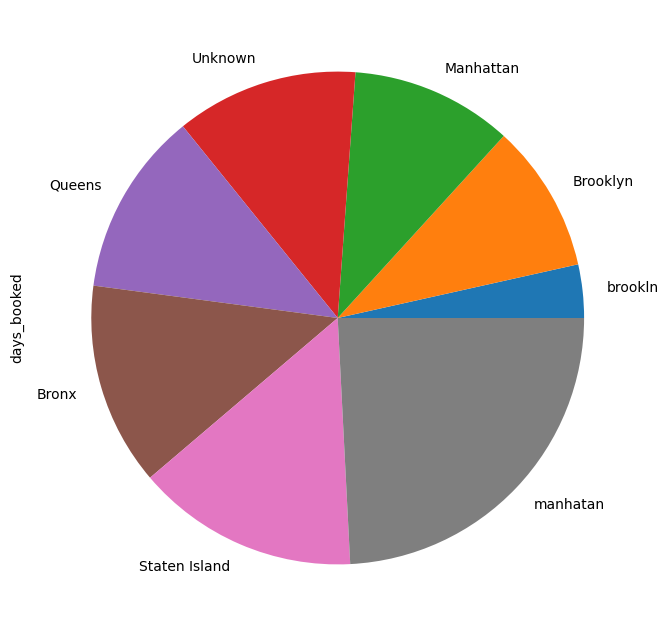

In [62]:
#how many bookings per year on average in each neighborhood

bpy = df_clean.groupby('neighbourhood group')['days_booked'].mean().sort_values()
print(bpy)
bpy.plot.pie(y= 'days booked', figsize=(8,8))